Secuencia
[1, 3, 2, 6, 5]
Tiempos
[59, 26, 55, 66, 0]
Tiempo
0
Colas
[[10], [8, 9], [7], [4], []]
Secuencia
[1, 8, 2, 6, 5]
Tiempos
[59, 70, 55, 66, 26]
Tiempo
26
Colas
[[10], [9], [7], [4, 3], []]
Secuencia
[1, 8, 7, 6, 5]
Tiempos
[59, 70, 55, 66, 79]
Tiempo
55
Colas
[[10], [9], [], [4, 3], [2]]
Secuencia
[10, 8, 7, 6, 5]
Tiempos
[59, 70, 59, 66, 79]
Tiempo
59
Colas
[[], [9, 1], [], [4, 3], [2]]
Secuencia
[10, 8, 7, 4, 5]
Tiempos
[66, 70, 121, 118, 79]
Tiempo
66
Colas
[[], [9, 1], [6], [3], [2]]
Secuencia
[10, 9, 7, 4, 5]
Tiempos
[70, 133, 121, 118, 79]
Tiempo
70
Colas
[[], [1], [6], [8, 3], [2]]
Secuencia
[10, 9, 7, 4, 2]
Tiempos
[79, 133, 121, 118, 79]
Tiempo
79
Colas
[[], [5, 1], [6], [8, 3], []]
Secuencia
[10, 9, 7, 8, 2]
Tiempos
[118, 133, 121, 170, 118]
Tiempo
118
Colas
[[], [5, 1], [4, 6], [3], []]
Secuencia
[10, 9, 4, 8, 2]
Tiempos
[121, 133, 168, 170, 171]
Tiempo
121
Colas
[[], [5, 1], [6], [3], [7]]
Secuencia
[10, 5, 4, 8, 2]
Tiempos
[168, 209, 168, 170, 171]
Tiempo
133
Cola

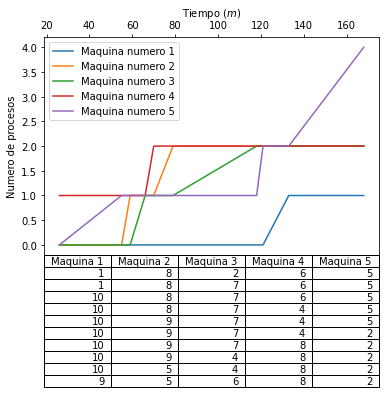

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

def importarPQR():
    datos = pd.read_excel('FP.xlsx', header=2, nrows=5)
    return datos

def importarTiempos():
    datos = pd.read_excel('FP.xlsx', header=15, nrows=10)
    return datos

def importarTiemposAlisto(numeroMaquina):
    datos = pd.read_excel('FP.xlsx',sheet_name=1, header=14*(numeroMaquina-1)+4, nrows=10)
    return datos

datosExcel = importarPQR()
datosTiempos = importarTiempos()

ultimoTiempo = 0
tiempoGlobal = 0
contadorTiempo = [0, 0, 0, 0, 0]

contadorProcesos = [0, 0, 0, 0, 0]

colaMaquina1 = []
colaMaquina2 = []
colaMaquina3 = []
colaMaquina4 = []
colaMaquina5 = []

maquinas = [colaMaquina1, colaMaquina2, colaMaquina3, colaMaquina4, colaMaquina5]


def iniciarCromosoma():
    return [1, 3, 2, 6, 5]

secuenciaPrincipal = iniciarCromosoma()


def asignarRestantes():
    global datosExcel
    global maquinas
    global contadorTiempo
    faltar = [4, 7, 8, 9, 10]
    for trabajo in faltar:
        variableExcel = 'J' + str(trabajo)
        maquina = datosExcel[variableExcel][0]
        maquinas[maquina-1] += [trabajo]
    tiempos = tiemposEnCola(secuenciaPrincipal, extraerElementosMaquinas())
    contador = 0
    for t in tiempos:
        contadorTiempo[contador] += t
        contador += 1


def secuencia():
    global datosTiempos
    global maquinas
    global ultimoTiempo
    global tiempoGlobal
    global contadorTiempo
    cols = []
    for i in range(len(maquinas)):
        tiempos = auxiliarOrdenarTiempos(maquinas[i], secuenciaPrincipal[i], i+1)
        nuevaCola = ordenarPorTiempos(tiempos, maquinas[i])
        maquinas[i] = nuevaCola
    print('Secuencia')
    print(secuenciaPrincipal)
    print('Tiempos')
    print(contadorTiempo)
    print('Tiempo')
    print(tiempoGlobal)
    print('Colas')
    print(maquinas)
    a = np.copy(np.array(contadorTiempo))
    x = np.where(a > tiempoGlobal)
    y = np.where(a <= tiempoGlobal)
    x = a[x]
    sm = np.argmin(x)
    a[y] = x[sm] + 1
    indice = np.argmin(a)
    indices = encontrarIndices(indice, contadorTiempo)
    for i in indices:
        cola = auxiliarEncontrarCola(i, secuenciaPrincipal[i])
        cols += [cola]
        maquinas[cola-1] += [secuenciaPrincipal[i]]
        tiempoGlobal += contadorTiempo[i] - ultimoTiempo
        ultimoTiempo = contadorTiempo[i]
        secuenciaPrincipal[i] = maquinas[i][0]
        maquinas[i] = maquinas[i][1:]
        tiemp = tiemposEnCola(secuenciaPrincipal, extraerElementosMaquinas())[i]
        contadorTiempo[i] += tiemp
        contador = 0
        for tiemposAux in contadorTiempo:
            if tiemposAux < tiempoGlobal:
                contadorTiempo[contador] = tiempoGlobal
            contador += 1
        prenderMaquina(cola)
    return cols, secuenciaPrincipal


def encontrarIndices(indiceP, tiempos):
    resultados = []
    valor = tiempos[indiceP]
    contador = 0
    for t in tiempos:
        if valor == t:
            resultados += [contador]
        contador += 1
    return resultados

def prenderMaquina(cola):
    global contadorTiempo
    if len(maquinas[cola - 1]) == 1:
        a = auxiliarOrdenarTiempos(maquinas[cola-1], maquinas[cola-1][0], cola)[0]
        contadorTiempo[cola-1] += a
        #while np.argmin(np.array(contadorTiempo)) != cola-1:
            #contadorTiempo[cola-1] += 100



def extraerElementosMaquinas():
    listaResultado = []
    global maquinas
    for maq in maquinas:
        if maq != []:
            listaResultado += [maq[0]]
        else:
            listaResultado += [None]
    return listaResultado


def auxiliarEncontrarCola(posicionTrabajo, trabajo):
    global datosExcel
    j = 'J' + str(trabajo)
    proceso = datosExcel[j]
    contador = 0
    for cola in proceso:
        if posicionTrabajo+1 == cola:
            if contador != 4:
                return proceso[contador + 1]
            else:
                return proceso[0]
        contador += 1
    return None

def auxiliarOrdenarTiempos(colasMaquina, proceso, numeroMaquina):
    global datosTiempos
    listaTiempos = []
    for procesoAux in colasMaquina:
        datosAlisto = importarTiemposAlisto(numeroMaquina)
        Ji = 'J' + str(proceso)
        Jj = procesoAux-1
        t1 = datosTiempos['M' + str(numeroMaquina)][procesoAux-1]
        t2 = datosAlisto[Ji][Jj]
        listaTiempos += [t1 + t2]
    return listaTiempos

def ordenarPorTiempos(listaTiempos, listaOrdenar):
    nuevaLista = []
    indices = np.argsort(listaTiempos)
    for i in indices:
        nuevaLista += [listaOrdenar[i]]
    return nuevaLista

def meterTrabajo(proceso):
    global datosExcel
    global maquinas
    global contadorTiempo
    faltar = [proceso]
    for trabajo in faltar:
        variableExcel = 'J' + str(trabajo)
        maquina = datosExcel[variableExcel][0]
        maquinas[maquina-1] += [trabajo]
    tiempos = tiemposEnCola(secuenciaPrincipal, extraerElementosMaquinas())
    contador = 0
    for t in tiempos:
        contadorTiempo[contador] += t
        contador += 1


def tiemposEnCola(secuencia, colas):
    tiemposAux = []
    contador = 0
    for elemento in colas:
        if elemento is not None:
            tiemposAux += auxiliarOrdenarTiempos([elemento], secuencia[contador], contador+1)
            contador += 1
        else:
            tiemposAux += [0]

    return tiemposAux

asignarRestantes()
tiemposGrafica = []
secuenciasGrafica = []
nP1 = []
nP2 = []
nP3 = []
nP4 = []
nP5 = []
nPGrafica = [nP1, nP2, nP3, nP4, nP5]
for i in range(10):
    cols, sec = secuencia()
    for i in cols:
        contadorProcesos[i-1] += 1
    secuenciasGrafica += [sec.copy()]
    tiemposGrafica += [tiempoGlobal]
    for n in range(len(nPGrafica)):
        nPGrafica[n] += [contadorProcesos[n]]
fig, ax = plt.subplots()
for j in range(len(nPGrafica)):
    ax.plot(tiemposGrafica, nPGrafica[j], label = 'Maquina numero '+str(j+1))
ax.set_xlabel('Tiempo $(m)$')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_ylabel('Numero de procesos')
ax.table(cellText = secuenciasGrafica, colLabels = ["Maquina 1", "Maquina 2", "Maquina 3", "Maquina 4", "Maquina 5"])
plt.legend()
plt.show()










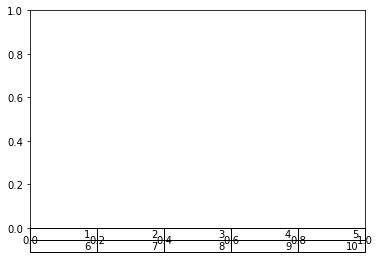

In [63]:
fig, ax = plt.subplots()
ax.table(cellText = [[1,2,3,4,5], [6,7,8,9,10]])
plt.show()